Author: Arend-Jan Quist \
Date created: 21 March 2022\
Last modified: 21 March 2022

Description: This program plots the multipliers from a simulation of the quantum algorithm as proposed by C.  Peikert in $\textit{He Gives C-Sieves on the CSIDH}$ (2020). 

To be improved:\

In [1]:
from C_sieve_simulator import * 

from matplotlib.ticker import MaxNLocator

C-sieve simulator imported.
Seed has been set.
For bugs and short documentation, see the C_sieve_simulator.py file.


In [2]:
def plot_subplots(plot_row, r, L, S_0, N):
    """ Parameters
    r =  arity (number of combined phase vectors in collimation)
    L =  wanted length of output phase vector
    S_0 =  [S_0] is the range of output phase vector
    N =  order of group
    """

    phasevectors=sieve(N, r, L, S_0, None,False)

    
    axs[plot_row, 0].hist(phasevectors[0],np.arange(-0.5,S_0-1 +0.5))
    axs[plot_row, 0].set_title("Distribution of the multipliers in the output phase vector \n"+
              r"$N$ = "+str(N)+r", $L_{wanted}$ = "+str(L)+r", $L_{realized}$ = "+str(phasevectors[1])+
              r", $S$ = "+str(S_0)+r", $r$ = "+str(r))
    
    
    histogram = np.histogram(phasevectors[0],np.arange(-0.5,S_0-1 +0.5))
    #print(np.histogram(histogram[0], max(histogram[0])))
    plot_range = np.arange(-0.5,max(histogram[0]+1.5)) #-0.5 might be replaced by min(histogram[0]-0.5)
    histogram2 = np.histogram(histogram[0],plot_range)
    axs[plot_row, 1].bar(plot_range[:-1]+0.5,histogram2[0])

    L_realized = phasevectors[1]

    # plot binomial distribution
    n_binom = phasevectors[1]-1  # L_realized - 1
    p = 1/S_0
    binom_distr = binom.pmf(plot_range[:-1]+0.5,n_binom,p) * S_0
    axs[plot_row, 1].plot(plot_range[:-1]+0.5,binom_distr,'o',color='orange')
    axs[plot_row, 1].plot(plot_range[:-1]+0.5,binom_distr,label="Binomial distribution",color='orange')

    axs[plot_row, 1].set_title("Histogram of the number of occurrence of the multipliers"+
                  "\n $N$ = "+str(N)+", $L_{wanted}$ = "+str(L)+", $L_{realized}$ = "+str(L_realized)+
                  ", $S$ = "+str(S_0)+", $r$ = "+str(r))
    
    
    axs[plot_row,1].legend()
    
    # set integers as x- and y-labels
    axs[plot_row,0].xaxis.set_major_locator(MaxNLocator(integer=True))
    axs[plot_row,0].yaxis.set_major_locator(MaxNLocator(integer=True))
    axs[plot_row,1].xaxis.set_major_locator(MaxNLocator(integer=True))
    axs[plot_row,1].yaxis.set_major_locator(MaxNLocator(integer=True))
    
    """      
            +
             
              "\n Empirical mean = "+str(np.round(np.mean(histogram[0]),2))+
              ", $(L_{realized}-1)/S$ = "+str(np.round((L_realized-1)/S_0,2))+"\n"+
              
              "Empirical variance = "+str(np.round(np.var(histogram[0]),2))+
              ", $(L_{realized}-1)(S-1)/S^2$ = "+str(np.round((L_realized-1)*(S_0-1)/S_0**2,2))
    """
    return

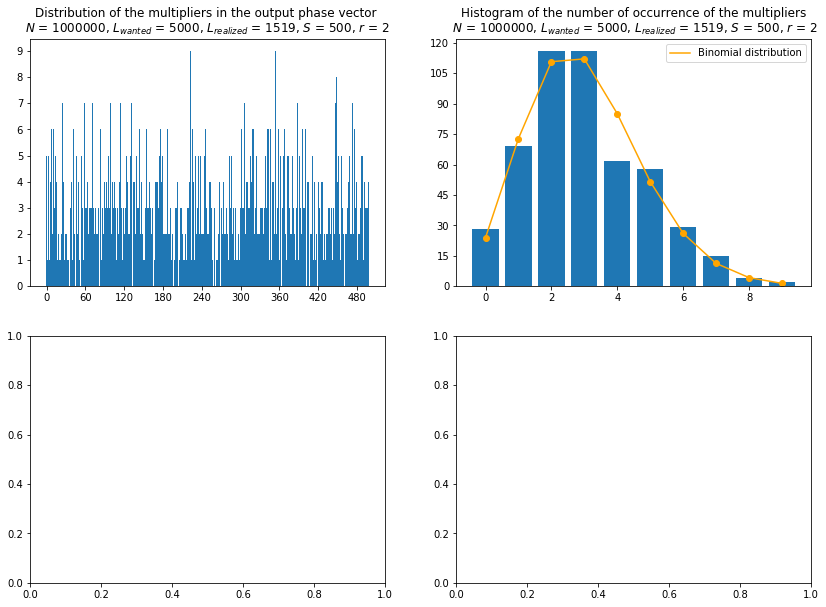

In [3]:
fig, axs = plt.subplots(2, 2, figsize=[14,10])
plot_subplots(0, 2, 5000, 500, 1_000_000)

# Save the first two subplots subplots 
# Pad the saved area by 20% in the x-direction and 30% in the y-direction
extent = axs[0,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('Distribution_multipliers.pdf', bbox_inches=extent.expanded(1.2, 1.3))

extent = axs[0,1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('Histogram_multipliers.pdf', bbox_inches=extent.expanded(1.2, 1.3))

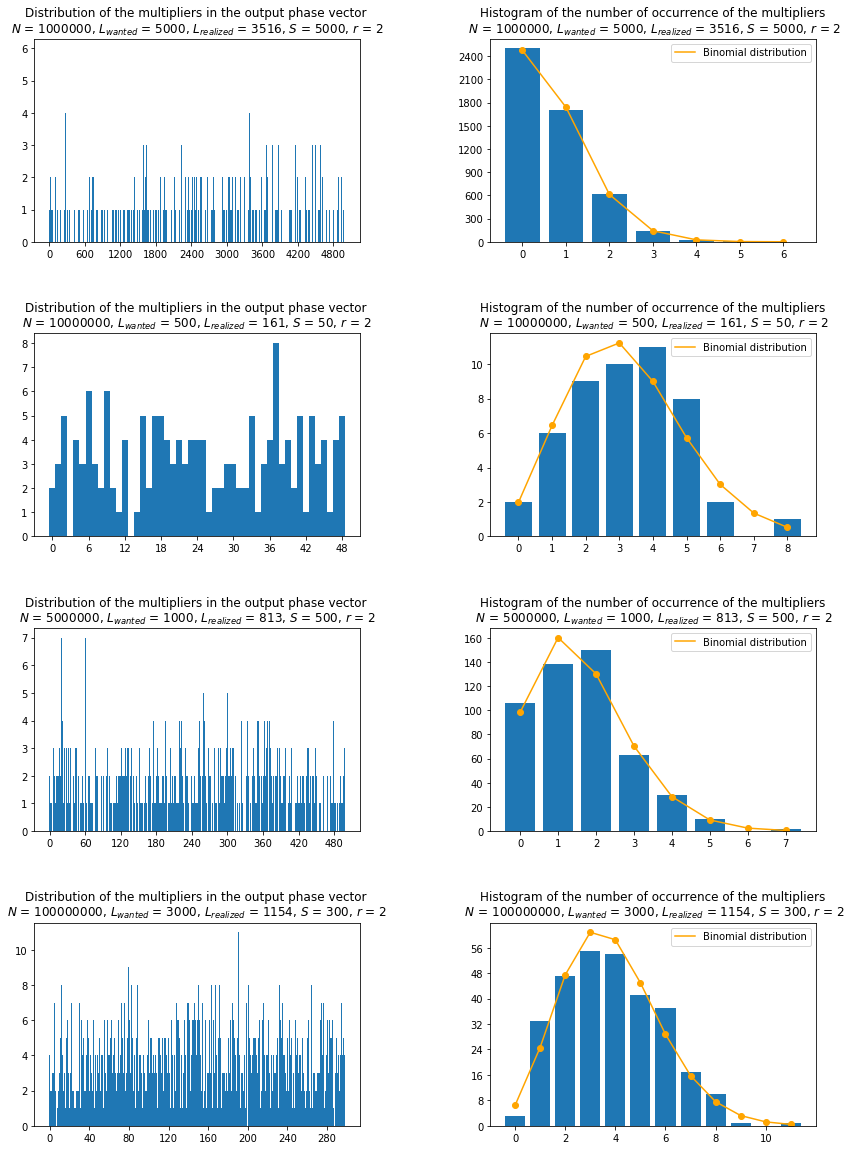

In [4]:


fig, axs = plt.subplots(4, 2, figsize=[14,20])
fig.subplots_adjust(hspace=0.45, wspace = 0.4)

#plot_subplot(0, 2, 50, 50, 1000)

plot_subplots(0, 2, 5000, 5000, 1_000_000)
plot_subplots(1, 2, 500, 50, 10_000_000)
plot_subplots(2, 2, 1000, 500, 5_000_000)
plot_subplots(3, 2, 3000, 300, 100_000_000)

#plt.legend()


plt.show()

In [5]:
# Save the full figure...
fig.savefig('Distribution_and_histogram_of_multipliers.pdf')